In [2]:
!pip install scipy

In [5]:
# This is for the same period of the quantiled mapped values: 

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Read the CSV file
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')

# Extract the MonthlyAvgFlow and Prev_MonthlyAvgFlow data
monthly_avg_flow = df['MonthlyAvgFlow'].values
prev_monthly_avg_flow = df['HistAvgFlow'].values

# Perform quantile mapping on MonthlyAvgFlow
def quantile_mapping(reference_data, model_data):
    sorted_ref = np.sort(reference_data)
    quantiles_ref = np.linspace(0, 1, len(sorted_ref))
    sorted_model = np.sort(model_data)
    quantiles_model = np.linspace(0, 1, len(sorted_model))
    interp_func = interp1d(quantiles_model, sorted_model, bounds_error=False, fill_value="extrapolate")
    mapped_values = interp_func(quantiles_ref)
    return np.interp(model_data, sorted_model, mapped_values)

# Assuming the last 22 years for the reference data
data_22_years = monthly_avg_flow[-22*12:]  # adjust based on your data structure
qm_values_prev_monthly_avg_flow = quantile_mapping(data_22_years, prev_monthly_avg_flow)

# Add the quantile-mapped values as a new column to the DataFrame
df['QM_Prev_MonthlyAvgFlow'] = qm_values_prev_monthly_avg_flow

# Save the updated DataFrame back to a CSV file
df.to_csv('Updated_Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv', index=False)

'''
# This is for the different quantiled mapped value periods: 
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Function for quantile mapping
def quantile_mapping(reference_data, model_data):
    # Sort the reference data and calculate its quantiles
    sorted_ref = np.sort(reference_data)
    quantiles_ref = np.linspace(0, 1, len(sorted_ref))

    # Sort the model data and calculate its quantiles
    sorted_model = np.sort(model_data)
    quantiles_model = np.linspace(0, 1, len(sorted_model))

    # Create an interpolation function based on the reference data
    interp_func = interp1d(quantiles_ref, sorted_ref, bounds_error=False, fill_value="extrapolate")

    # Map the model data quantiles to the reference data
    mapped_values = interp_func(quantiles_model)

    return mapped_values


# Read the 22-year data
df_22_years = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')
# Assuming you want to use the 'MonthlyAvgFlow' column from this dataset
data_22_years = df_22_years['MonthlyAvgFlow'].values

# Read the 100-year data
df_100_years = pd.read_csv('Prev_Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')
# Assuming the data to be quantile mapped is in the 'MonthlyAvgFlow' column
data_100_years = df_100_years['MonthlyAvgFlow'].values

# Perform quantile mapping
qm_values_100_years = quantile_mapping(data_22_years, data_100_years)

# Add the quantile-mapped values as a new column to the 100-year DataFrame
df_100_years['QM_MonthlyAvgFlow'] = qm_values_100_years

# Save the updated DataFrame back to a CSV file
df_100_years.to_csv('Updated_Prev_Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv', index=False)
'''

'\n# This is for the different quantiled mapped value periods: \nimport pandas as pd\nimport numpy as np\nfrom scipy.interpolate import interp1d\n\n# Function for quantile mapping\ndef quantile_mapping(reference_data, model_data):\n    # Sort the reference data and calculate its quantiles\n    sorted_ref = np.sort(reference_data)\n    quantiles_ref = np.linspace(0, 1, len(sorted_ref))\n\n    # Sort the model data and calculate its quantiles\n    sorted_model = np.sort(model_data)\n    quantiles_model = np.linspace(0, 1, len(sorted_model))\n\n    # Create an interpolation function based on the reference data\n    interp_func = interp1d(quantiles_ref, sorted_ref, bounds_error=False, fill_value="extrapolate")\n\n    # Map the model data quantiles to the reference data\n    mapped_values = interp_func(quantiles_model)\n\n    return mapped_values\n\n\n# Read the 22-year data\ndf_22_years = pd.read_csv(\'Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv\')\n# Assuming you want to use the \

Sorted Reference Data: [   8.83152294   10.05092432   10.524271     11.0289769    12.17965032
   12.19681443   13.37734116   15.83892765   16.16677517   16.20204248
   16.34923447   17.77886274   18.00461087   18.03850161   18.21649923
   18.6544997    19.0140228    19.09740463   19.38463729   19.6001487
   19.77053571   19.90771245   20.52334648   20.77728942   20.93630061
   21.26582513   21.27318267   21.74369716   22.34145207   23.05559387
   23.46318423   23.53506361   23.92286074   24.07570129   24.581689
   24.93436106   25.19949037   25.3265251    25.62688994   26.07107653
   27.2050709    27.32617248   27.4772883    27.9167602    28.0639048
   28.2375354    28.57842037   29.03505907   29.29893823   30.37538797
   30.55053735   31.84730842   31.94606923   33.42928657   33.54991355
   34.00985903   34.1444093    34.41047203   34.73608861   34.8713036
   34.9826429    36.43103607   36.83598423   37.13074813   37.65809529
   37.84036477   38.87987      39.270515     39.29567213   

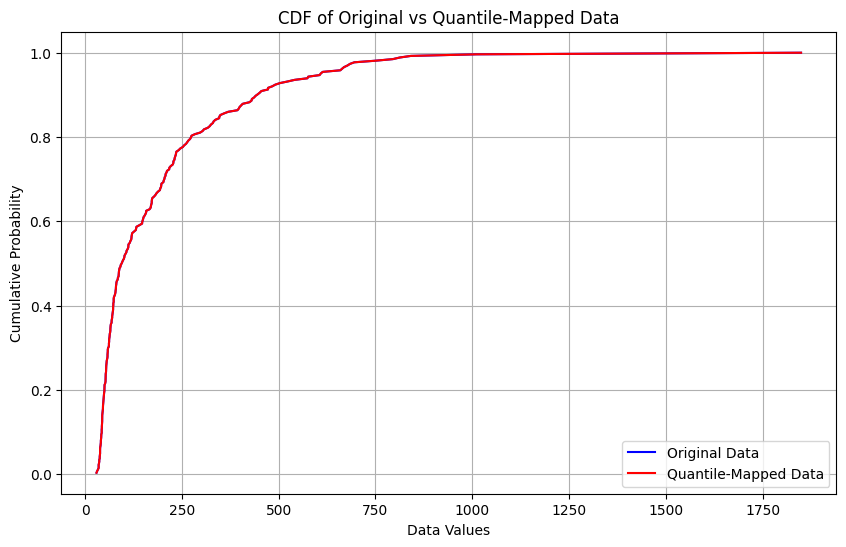

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Read the CSV file
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR.csv')

# Extract the MonthlyAvgFlow and Prev_MonthlyAvgFlow data
monthly_avg_flow = df['MonthlyAvgFlow'].values
prev_monthly_avg_flow = df['HistAvgFlow'].values

# Perform quantile mapping on MonthlyAvgFlow
def quantile_mapping(reference_data, model_data):
    sorted_ref = np.sort(reference_data)
    quantiles_ref = np.linspace(0, 1, len(sorted_ref))
    sorted_model = np.sort(model_data)
    quantiles_model = np.linspace(0, 1, len(sorted_model))
    interp_func = interp1d(quantiles_model, sorted_model, bounds_error=False, fill_value="extrapolate")
    mapped_values = interp_func(quantiles_ref)

    # Debugging: Print intermediate results
    print("Sorted Reference Data:", sorted_ref)
    print("Sorted Model Data:", sorted_model)
    print("Mapped Values:", mapped_values)

    return np.interp(model_data, sorted_model, mapped_values)

# Assuming the last 22 years for the reference data
data_22_years = monthly_avg_flow[-22*12:]  # adjust based on your data structure
qm_values_prev_monthly_avg_flow = quantile_mapping(data_22_years, prev_monthly_avg_flow)

# Add the quantile-mapped values as a new column to the DataFrame
df['QM_Prev_MonthlyAvgFlow'] = qm_values_prev_monthly_avg_flow

# Function to calculate and plot CDF
def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.plot(sorted_data, yvals, label=label, color=color)

# Plot CDFs
plt.figure(figsize=(10, 6))
plot_cdf(prev_monthly_avg_flow, "Original Data", "blue")
plot_cdf(qm_values_prev_monthly_avg_flow, "Quantile-Mapped Data", "red")
plt.title("CDF of Original vs Quantile-Mapped Data")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

# Save the updated DataFrame back to a CSV file
df.to_csv('Updated_Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR.csv', index=False)


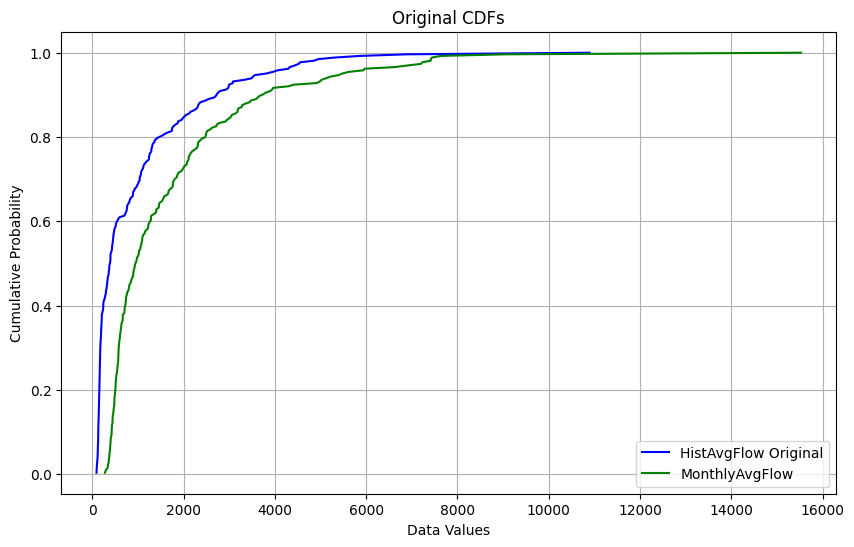

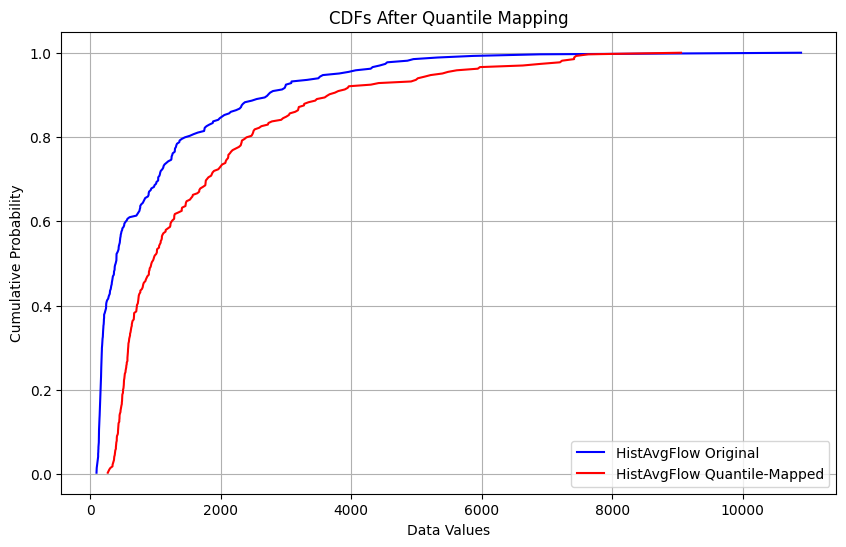

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming your file is in Excel format (xlsx or xls)
file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.xlsx'

# Read data from Sheet1 and Sheet2
df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Extracting the MonthlyAvgFlow and HistAvgFlow data
monthly_avg_flow = df_sheet1['MonthlyAvgFlow'].values
hist_avg_flow = df_sheet2['HistAvgFlow'].values

# Perform quantile mapping on HistAvgFlow
def quantile_mapping(reference_data, model_data):
    # Calculate empirical CDFs for both datasets
    model_sorted = np.sort(model_data)
    ref_sorted = np.sort(reference_data)
    model_cdf = np.arange(1, len(model_data) + 1) / len(model_data)
    ref_cdf = np.arange(1, len(reference_data) + 1) / len(reference_data)

    # Interpolation function: model CDF to reference data
    interp_func = interp1d(model_cdf, ref_sorted, bounds_error=False, fill_value="extrapolate")
    
    # Map model data to quantile values of reference data
    mapped_values = interp_func(np.argsort(np.argsort(model_data)) / len(model_data))

    return mapped_values


# Assuming the last 22 years for the reference data
data_22_years = monthly_avg_flow[-22*12:]  # adjust based on your data structure
qm_values_hist_avg_flow = quantile_mapping(data_22_years, hist_avg_flow)

# Adding the quantile-mapped values as a new column to the DataFrame of Sheet2
df_sheet2['QM_HistAvgFlow'] = qm_values_hist_avg_flow

# Function to calculate and plot CDF
def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.plot(sorted_data, yvals, label=label, color=color)

# Plot original CDFs
plt.figure(figsize=(10, 6))
plot_cdf(hist_avg_flow, "HistAvgFlow Original", "blue")
plot_cdf(monthly_avg_flow, "MonthlyAvgFlow", "green")
plt.title("Original CDFs")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

# Apply quantile mapping
qm_values_hist_avg_flow = quantile_mapping(monthly_avg_flow, hist_avg_flow)

# Plot CDFs after quantile mapping
plt.figure(figsize=(10, 6))
plot_cdf(hist_avg_flow, "HistAvgFlow Original", "blue")
plot_cdf(qm_values_hist_avg_flow, "HistAvgFlow Quantile-Mapped", "red")
plt.title("CDFs After Quantile Mapping")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


# Save the updated DataFrame (Sheet2) back to an Excel file
df_sheet2.to_excel('Updated_Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.xlsx', index=False)


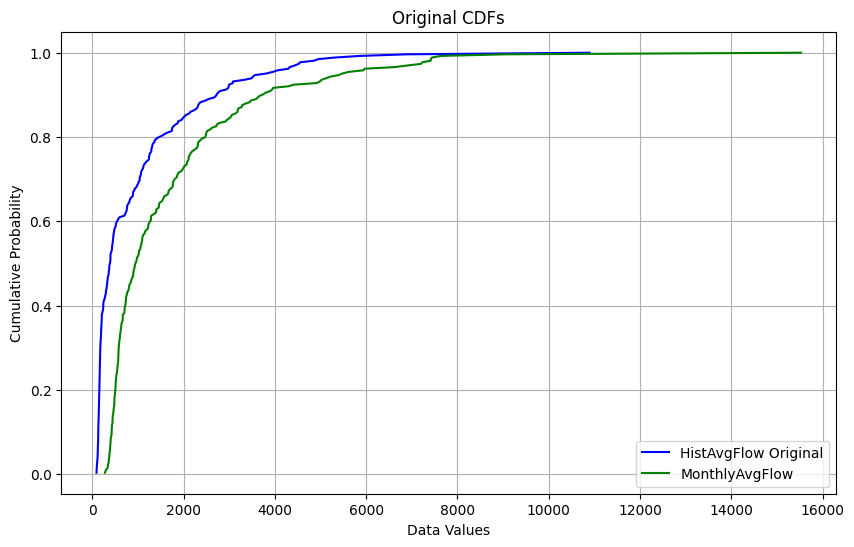

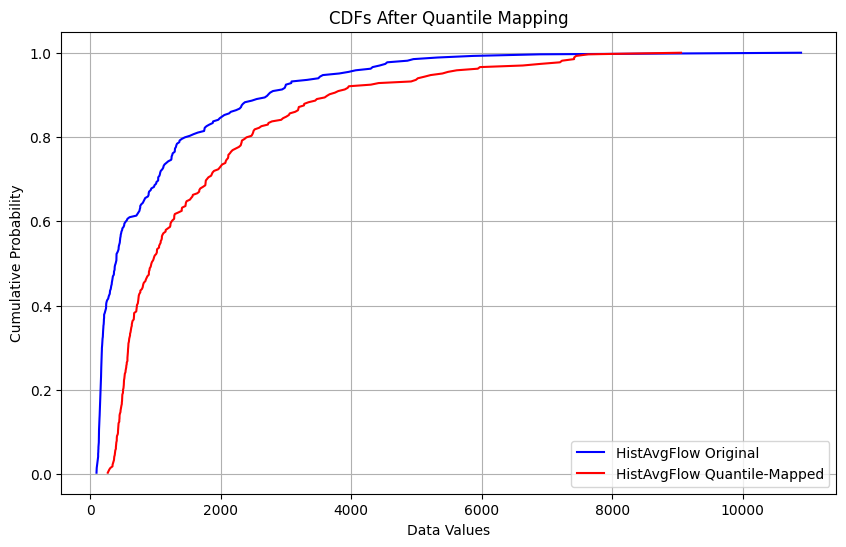

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.xlsx'


df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')


monthly_avg_flow = df_sheet1['MonthlyAvgFlow'].values
hist_avg_flow = df_sheet2['HistAvgFlow'].values


def quantile_mapping(reference_data, model_data):
    
    model_sorted = np.sort(model_data)
    ref_sorted = np.sort(reference_data)
    model_cdf = np.arange(1, len(model_data) + 1) / len(model_data)
    ref_cdf = np.arange(1, len(reference_data) + 1) / len(reference_data)

  
    interp_func = interp1d(model_cdf, ref_sorted, bounds_error=False, fill_value="extrapolate")
    
    
    mapped_values = interp_func(np.argsort(np.argsort(model_data)) / len(model_data))

    return mapped_values



data_22_years = monthly_avg_flow[-22*12:]  
qm_values_hist_avg_flow = quantile_mapping(data_22_years, hist_avg_flow)


df_sheet2['QM_HistAvgFlow'] = qm_values_hist_avg_flow


def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.plot(sorted_data, yvals, label=label, color=color)


plt.figure(figsize=(10, 6))
plot_cdf(hist_avg_flow, "HistAvgFlow Original", "blue")
plot_cdf(monthly_avg_flow, "MonthlyAvgFlow", "green")
plt.title("Original CDFs")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


qm_values_hist_avg_flow = quantile_mapping(monthly_avg_flow, hist_avg_flow)


plt.figure(figsize=(10, 6))
plot_cdf(hist_avg_flow, "HistAvgFlow Original", "blue")
plot_cdf(qm_values_hist_avg_flow, "HistAvgFlow Quantile-Mapped", "red")
plt.title("CDFs After Quantile Mapping")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()



df_sheet2.to_excel('Updated_Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.xlsx', index=False)

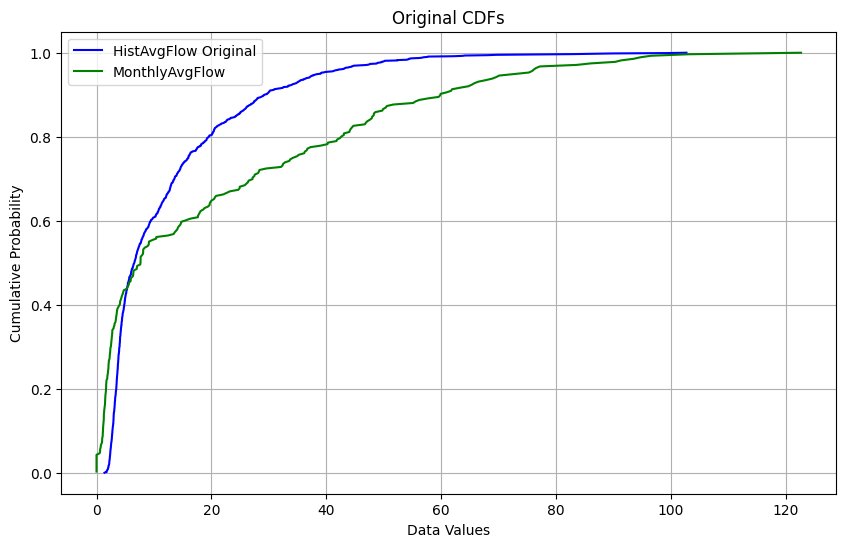

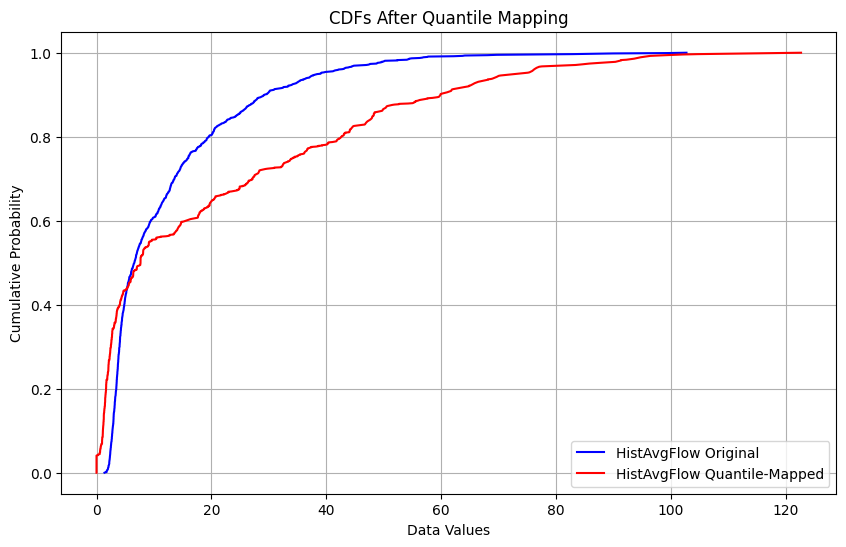

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR_L.xlsx'


df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')


monthly_avg_flow = df_sheet1['MonthlyAvgFlow'].values
hist_avg_flow = df_sheet2['HistAvgFlow'].values


def quantile_mapping(reference_data, model_data):
    # Sort both datasets
    ref_sorted = np.sort(reference_data)
    model_sorted = np.sort(model_data)

    # Calculate quantiles for both datasets
    ref_quantiles = np.linspace(0, 1, len(ref_sorted))
    model_quantiles = np.linspace(0, 1, len(model_sorted))

    # Create an interpolation function from model data quantiles to reference data quantiles
    interp_to_ref_quantiles = interp1d(model_sorted, model_quantiles, bounds_error=False, fill_value="extrapolate")
    
    # Map model data values to reference data quantiles, then to reference data sorted values
    ref_data_quantiles = interp_to_ref_quantiles(model_data)
    mapped_values = np.interp(ref_data_quantiles, ref_quantiles, ref_sorted)

    return mapped_values




data_22_years = monthly_avg_flow[-22*12:]  
qm_values_hist_avg_flow = quantile_mapping(data_22_years, hist_avg_flow)

# Ensure the length matches the length of 'hist_avg_flow'
assert len(qm_values_hist_avg_flow) == len(hist_avg_flow)

# Assign the quantile-mapped values to the DataFrame
df_sheet2['QM_HistAvgFlow'] = qm_values_hist_avg_flow


def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.plot(sorted_data, yvals, label=label, color=color)


plt.figure(figsize=(10, 6))
plot_cdf(hist_avg_flow, "HistAvgFlow Original", "blue")
plot_cdf(monthly_avg_flow, "MonthlyAvgFlow", "green")
plt.title("Original CDFs")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


qm_values_hist_avg_flow = quantile_mapping(monthly_avg_flow, hist_avg_flow)

plt.figure(figsize=(10, 6))
plot_cdf(hist_avg_flow, "HistAvgFlow Original", "blue")
plot_cdf(qm_values_hist_avg_flow, "HistAvgFlow Quantile-Mapped", "red")
plt.title("CDFs After Quantile Mapping")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()




df_sheet2.to_excel('Updated_Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR_L.xlsx', index=False)

In [3]:
import pandas as pd
import numpy as np

# Load your data
# Replace 'your_data.csv' with your actual file path
# Replace 'scenario1', 'scenario2', and 'historical' with your actual column names
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')
scenario1_col = 'PostFire_realistic'
scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'

# Step 2: Calculate Differences Between Scenarios
df['scenario_difference'] = df[scenario1_col] - df[scenario2_col]

# Step 3: Quantile Mapping
# Define quantiles
quantiles = np.linspace(0, 1, 11)  # 10 quantiles (0%, 10%, 20%, ..., 100%)

# Map historical data to quantiles
historical_quantiles = df[historical_col].quantile(quantiles)

# Map scenario differences to historical quantiles
mapped_differences = np.interp(df['scenario_difference'], historical_quantiles, quantiles)

# Step 4: Adjust Historical Data
# Assuming a linear adjustment for simplicity
df['adjusted_historical'] = df[historical_col] + mapped_differences

# Save or process your adjusted data
df.to_csv('adjusted_historical_data.csv', index=False)


In [6]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')

# Define your columns
scenario1_col = 'PostFire_realistic'
scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'
month_col = 'Month'  # Replace with your actual month column name

# Step 2: Calculate Differences Between Scenarios
df['scenario_difference'] = df[scenario1_col] - df[scenario2_col]

# Prepare a column for the adjusted historical data
df['adjusted_historical'] = df[historical_col]

# Step 3: Quantile Mapping
# Define quantiles
quantiles = np.linspace(0, 1, 11)  # 10 quantiles (0%, 10%, 20%, ..., 100%)

# Perform quantile mapping for each month
for Month in df[month_col].unique():
    # Filter data for the current month
    month_data = df[df[month_col] == Month]

    # Map historical data to quantiles for the current month
    historical_quantiles = month_data[historical_col].quantile(quantiles)

    # Map scenario differences to historical quantiles for the current month
    mapped_differences = np.interp(month_data['scenario_difference'], historical_quantiles.index, historical_quantiles.values)

    # Step 4: Adjust Historical Data for the current month
    df.loc[df[month_col] == Month, 'adjusted_historical'] = month_data[historical_col] + mapped_differences

# Save or process your adjusted data
df.to_csv('adjusted_historical_data_monthly.csv', index=False)


In [8]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')

# Define your columns
scenario1_col = 'PostFire_realistic'
scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'
month_col = 'Month'  # Make sure this is your month column name

# Step 2: Calculate Differences Between Scenarios
df['scenario_difference'] = df[scenario1_col] - df[scenario2_col]

# Prepare a column for the adjusted historical data
df['adjusted_historical'] = df[historical_col]

# Step 3: Quantile Mapping for Each Month
# Define quantiles
quantiles = np.linspace(0, 1, 11)  # 10 quantiles (0%, 10%, 20%, ..., 100%)

# Perform quantile mapping for each month
for Month in range(1, 13):  # Assuming month numbers are from 1 to 12
    # Filter data for the current month
    month_data = df[df[month_col] == Month]

    # If there is no data for a month, skip it
    if month_data.empty:
        continue

    # Map historical data to quantiles for the current month
    historical_quantiles = month_data[historical_col].quantile(quantiles)

    # Interpolating the scenario differences to historical quantiles
    # Ensure both inputs to np.interp() are numpy arrays for proper functionality
    mapped_differences = np.interp(
        month_data['scenario_difference'].to_numpy(), 
        historical_quantiles.index.to_numpy(), 
        historical_quantiles.values
    )

    # Step 4: Adjust Historical Data for the current month
    df.loc[df[month_col] == Month, 'adjusted_historical'] = month_data[historical_col].values + mapped_differences

# Save or process your adjusted data
df.to_csv('adjusted_historical_data_monthly.csv', index=False)


In [9]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')

# Define your columns
scenario1_col = 'PostFire_realistic'
scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'

# Step 2: Calculate Differences Between Scenarios
df['scenario_difference'] = df[scenario1_col] - df[scenario2_col]

# Step 3: Quantile Mapping (without considering month categories)
# Define quantiles
quantiles = np.linspace(0, 1, 11)  # 10 quantiles (0%, 10%, 20%, ..., 100%)

# Map historical data to quantiles
historical_quantiles = df[historical_col].quantile(quantiles)

# Map scenario differences to historical quantiles
# We are mapping the entire scenario difference distribution to the historical quantiles
mapped_differences = np.interp(df['scenario_difference'], historical_quantiles.index, historical_quantiles.values)

# Step 4: Adjust Historical Data
# Add the mapped differences to the historical data
df['adjusted_historical'] = df[historical_col] + mapped_differences

# Save or process your adjusted data
df.to_csv('adjusted_historical_data.csv', index=False)

In [12]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')

# Define your columns
scenario1_col = 'PostFire_realistic'
scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'

# Step 1: Quantile Mapping for PostFire and PreFire Scenarios
quantiles = np.linspace(0, 1, 11)  # 10 quantiles (0%, 10%, 20%, ..., 100%)

# Determine quantiles for both scenarios
postfire_quantiles = df[scenario1_col].quantile(quantiles)
prefire_quantiles = df[scenario2_col].quantile(quantiles)

# Step 2: Calculate the Differences for Each Quantile
quantile_differences = postfire_quantiles - prefire_quantiles

# Step 3: Adjust the Historical Data (HistAvgFlow)
# Map historical data to quantiles
historical_quantiles = df[historical_col].quantile(quantiles)

# Initialize a column for adjusted historical data
df['adjusted_historical'] = df[historical_col]

# Apply quantile-specific adjustments
for q in quantiles:
    # Find the difference for the current quantile
    quantile_diff = quantile_differences[q]

    # Identify historical data points within this quantile
    quantile_mask = (df[historical_col] <= historical_quantiles[q])

    # Apply the quantile-specific adjustment
    df.loc[quantile_mask, 'adjusted_historical'] += quantile_diff

# Save or process your adjusted data
df.to_csv('bias_corrected_historical_data.csv', index=False)


In [44]:
#### This is working properly for the same period of quantile mapping
'''
The taken steps are as follows: 1- Calculates the percentage change between PostFire_realistic and PreFire_base for each quantile.
2- Applies these percentage changes to the corresponding HistAvgFlow values within the same quantiles.
3- Saves the adjusted data to a new CSV file.
This approach adjusts the HistAvgFlow values by a percentage that reflects the change observed between the post-fire and pre-fire scenarios, providing a more nuanced adjustment based on the relative changes observed in the data.
'''
import pandas as pd
import numpy as np

# Load your data
#df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_MER.csv')
df = pd.read_csv('Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR.csv')

# Define your columns
scenario1_col = 'PostFire_realistic'
scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'
month_col = 'Month'  # Assuming you have a 'Month' column

# Ensure Month column is correctly formatted (as int or categorical)
df[month_col] = df[month_col].astype(int)

# Step 1: Quantile Mapping for PostFire and PreFire Scenarios, by Month
quantiles = np.linspace(0, 1, 11)  # 10 quantiles (0%, 10%, 20%, ..., 100%)

# Initialize a column for adjusted historical data
df['adjusted_historical'] = np.nan

# Iterate over each month
for month in df[month_col].unique():
    # Filter the DataFrame for the current month
    df_month = df[df[month_col] == month]

    # Determine quantiles for both scenarios in the current month
    postfire_quantiles = df_month[scenario1_col].quantile(quantiles)
    prefire_quantiles = df_month[scenario2_col].quantile(quantiles)
    historical_quantiles = df_month[historical_col].quantile(quantiles)

    # Calculate percentage change for each quantile
    quantile_percentage_changes = ((postfire_quantiles - prefire_quantiles) / prefire_quantiles) * 100

    # Apply percentage changes to the historical data
    for q in quantiles:
        # Calculate the adjustment factor
        adjustment_factor = 1 + (quantile_percentage_changes[q] / 100)

        # Identify historical data points within this quantile for the current month
        quantile_mask = (df[month_col] == month) & (df[historical_col] <= historical_quantiles[q])

        # Apply the quantile-specific adjustment
        df.loc[quantile_mask, 'adjusted_historical'] = df.loc[quantile_mask, historical_col] * adjustment_factor

# Replace NaN values in 'adjusted_historical' with original 'HistAvgFlow' values
df['adjusted_historical'].fillna(df[historical_col], inplace=True)

# Save or process your adjusted data
df.to_csv('bias_corrected_historical_data_monthly_percentage.csv', index=False)


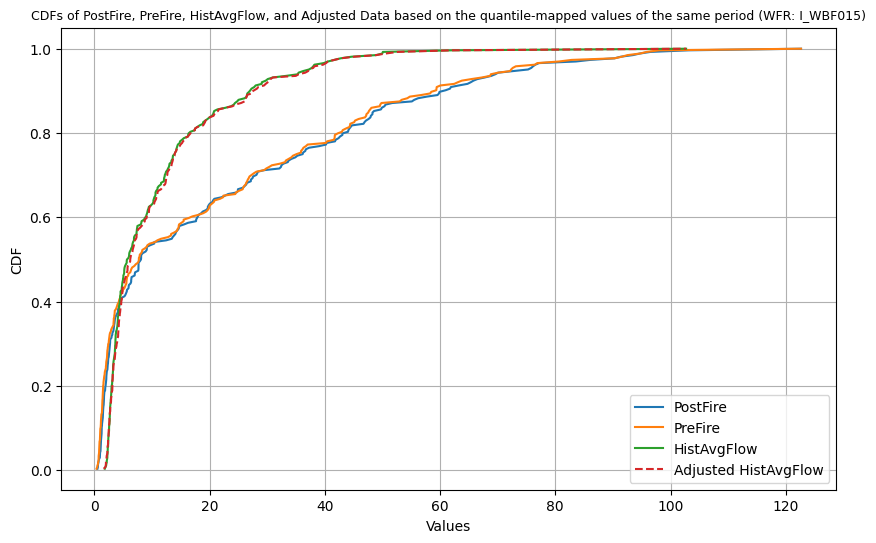

In [46]:
#### This is working properly for plotting the same periods of quantile mapping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('bias_corrected_historical_data_monthly_percentage.csv')

# Columns
scenario1_col = 'PostFire_realistic'
scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'
adjusted_col = 'adjusted_historical'  # Assuming this is already calculated and added to the DataFrame

# Function to calculate CDF
def calculate_cdf(data):
    # Sort data
    data_sorted = np.sort(data)
    # Calculate CDF values
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    return data_sorted, cdf

# Calculate CDFs for each dataset
postfire_x, postfire_cdf = calculate_cdf(df[scenario1_col].dropna())
prefire_x, prefire_cdf = calculate_cdf(df[scenario2_col].dropna())
historical_x, historical_cdf = calculate_cdf(df[historical_col].dropna())
adjusted_x, adjusted_cdf = calculate_cdf(df[adjusted_col].dropna())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(postfire_x, postfire_cdf, label='PostFire')
plt.plot(prefire_x, prefire_cdf, label='PreFire')
plt.plot(historical_x, historical_cdf, label='HistAvgFlow')
plt.plot(adjusted_x, adjusted_cdf, label='Adjusted HistAvgFlow', linestyle='--')

#plt.title('CDFs of PostFire, PreFire, HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the same period (MER: I_MFF019)', fontsize=9)
plt.title('CDFs of PostFire, PreFire, HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the same period (WFR: I_WBF015)', fontsize=9)
plt.xlabel('Values')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
#### This is working properly for the differnt periods of quantile mapping
'''
The taken steps are as follows: 
To implement the quantile mapping method with interpolation for the case where HistAvgFlow covers a longer period than PostFire_realistic and PreFire_base, 
the approach is different than the when we apply to the same period. We'll read data from the three separate sheets of the Excel file and then use interpolation 
to align and map the quantiles across the different time periods. Here's how you can do it:

1- Reading (loading) Data from Different SpreadSheets:

We'll read each sheet into a separate DataFrame.
2- Aligning (index) Data by Month:

We'll need to create a consistent monthly time series that can be used for alignment.
3. Quantile Mapping with Interpolation:

We calculate quantile differences or percentage changes for the overlapping period between PostFire_realistic and PreFire_base.
We'll then interpolate these changes to apply them to the entire HistAvgFlow series.

Overall, data from each spreadsheet is loaded into separate DataFrames.
A Date column is created for each DataFrame to align data by month and year.
Quantile percentage changes are calculated for the overlapping period and then interpolated to apply to the entire HistAvgFlow series.
The adjusted_historical values are calculated by applying these interpolated changes.
This approach assumes that the relationships captured in the overlapping period can be reasonably extended to the entire period covered by the HistAvgFlow data. 
The interpolation step bridges the gap where direct quantile mapping isn't possible due to the differing time periods.
'''
import pandas as pd
import numpy as np

# Loading the data from Excel sheets
#file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_MER_L.xlsx'
file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR_L.xlsx'
df_prefire = pd.read_excel(file_path, sheet_name='Sheet1')
df_postfire = pd.read_excel(file_path, sheet_name='Sheet2')
df_hist = pd.read_excel(file_path, sheet_name='Sheet3')


for df in [df_prefire, df_postfire, df_hist]:
    df['Year'] = df['Year'].astype(int)
    df['Month'] = df['Month'].astype(int)

# Create a date index for alignment
df_prefire['Date'] = pd.to_datetime(df_prefire[['Year', 'Month']].assign(DAY=1))
df_postfire['Date'] = pd.to_datetime(df_postfire[['Year', 'Month']].assign(DAY=1))
df_hist['Date'] = pd.to_datetime(df_hist[['Year', 'Month']].assign(DAY=1))


df_prefire.set_index('Date', inplace=True)
df_postfire.set_index('Date', inplace=True)
df_hist.set_index('Date', inplace=True)

# Quantile Mapping for PostFire and PreFire Scenarios, by Month (11 quantiles (0%, 10%, 20%, ..., 100%))
quantiles = np.linspace(0, 1, 101)  


df_hist['adjusted_historical'] = np.nan


# Initialize empty DataFrames
quantile_changes_data = []
interpolated_changes_data = []


for month in range(1, 13):  
    
    postfire_quantiles = df_postfire[df_postfire['Month'] == month]['PostFire_realistic'].quantile(quantiles)
    prefire_quantiles = df_prefire[df_prefire['Month'] == month]['PreFire_base'].quantile(quantiles)

    
    quantile_percentage_changes = ((postfire_quantiles - prefire_quantiles) / prefire_quantiles) * 100

    
    interpolated_changes = np.interp(df_hist[df_hist['Month'] == month]['HistAvgFlow'],
                                     prefire_quantiles, quantile_percentage_changes)

     # Save quantile percentage changes for each month
    quantile_changes_data.append({
        'Month': month,
        'QuantilePercentageChanges': quantile_percentage_changes.tolist()  # Assuming this is a pandas Series or numpy array
    })

    # Save interpolated changes for each month
    interpolated_changes_data.append({
        'Month': month,
        'InterpolatedChanges': interpolated_changes.tolist()  # Assuming this is a numpy array
    })
    df_hist.loc[df_hist['Month'] == month, 'adjusted_historical'] = \
        df_hist[df_hist['Month'] == month]['HistAvgFlow'] * (1 + interpolated_changes / 100)


df_hist['adjusted_historical'].fillna(df_hist['HistAvgFlow'], inplace=True)

df_quantile_changes = pd.DataFrame(quantile_changes_data)
df_interpolated_changes = pd.DataFrame(interpolated_changes_data)
# Save to CSV
df_quantile_changes.to_csv('quantile_percentage_changes.csv', index=False)
df_interpolated_changes.to_csv('interpolated_changes.csv', index=False)
#df_hist.to_csv('bias_corrected_historical_data_interpolated_MER_I_MFF019.csv')
df_hist.to_csv('bias_corrected_historical_data_interpolated_WFR_I_WBF015._test.csv')

In [70]:
#### This is working properly for the differnt periods of quantile mapping
'''
The taken steps are as follows: 
To implement the quantile mapping method with interpolation for the case where HistAvgFlow covers a longer period than PostFire_realistic and PreFire_base, 
the approach is different than the when we apply to the same period. We'll read data from the three separate sheets of the Excel file and then use interpolation 
to align and map the quantiles across the different time periods. Here's how you can do it:

1- Reading (loading) Data from Different SpreadSheets:

We'll read each sheet into a separate DataFrame.
2- Aligning (index) Data by Month:

We'll need to create a consistent monthly time series that can be used for alignment.
3. Quantile Mapping with Interpolation:

We calculate quantile differences or percentage changes for the overlapping period between PostFire_realistic and PreFire_base.
We'll then interpolate these changes to apply them to the entire HistAvgFlow series.

Overall, data from each spreadsheet is loaded into separate DataFrames.
A Date column is created for each DataFrame to align data by month and year.
Quantile percentage changes are calculated for the overlapping period and then interpolated to apply to the entire HistAvgFlow series.
The adjusted_historical values are calculated by applying these interpolated changes.
This approach assumes that the relationships captured in the overlapping period can be reasonably extended to the entire period covered by the HistAvgFlow data. 
The interpolation step bridges the gap where direct quantile mapping isn't possible due to the differing time periods.
'''
import pandas as pd
import numpy as np

# Loading the data from Excel sheets
file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_MER_L.xlsx'
#file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR_L.xlsx'
df_prefire = pd.read_excel(file_path, sheet_name='Sheet1')
df_postfire = pd.read_excel(file_path, sheet_name='Sheet2')
df_hist = pd.read_excel(file_path, sheet_name='Sheet3')


for df in [df_prefire, df_postfire, df_hist]:
    df['Year'] = df['Year'].astype(int)
    df['Month'] = df['Month'].astype(int)

# Create a date index for alignment
df_prefire['Date'] = pd.to_datetime(df_prefire[['Year', 'Month']].assign(DAY=1))
df_postfire['Date'] = pd.to_datetime(df_postfire[['Year', 'Month']].assign(DAY=1))
df_hist['Date'] = pd.to_datetime(df_hist[['Year', 'Month']].assign(DAY=1))


df_prefire.set_index('Date', inplace=True)
df_postfire.set_index('Date', inplace=True)
df_hist.set_index('Date', inplace=True)

# Quantile Mapping for PostFire and PreFire Scenarios, by Month (11 quantiles (0%, 10%, 20%, ..., 100%))
quantiles = np.linspace(0, 1, 101)  


df_hist['adjusted_historical'] = np.nan


for month in range(1, 13):
    postfire_quantiles = df_postfire[df_postfire['Month'] == month]['PostFire_realistic'].quantile(quantiles)
    prefire_quantiles = df_prefire[df_prefire['Month'] == month]['PreFire_base'].quantile(quantiles)
    quantile_percentage_changes = ((postfire_quantiles - prefire_quantiles) / prefire_quantiles) * 100

    # Compute quantiles for historical data
    historical_quantiles = df_hist[df_hist['Month'] == month]['HistAvgFlow'].quantile(quantiles)

    # Interpolate the changes using historical data quantiles
    interpolated_changes = np.interp(df_hist[df_hist['Month'] == month]['HistAvgFlow'],
                                     historical_quantiles, quantile_percentage_changes)

    # Apply the interpolated changes
    df_hist.loc[df_hist['Month'] == month, 'adjusted_historical'] = \
        df_hist[df_hist['Month'] == month]['HistAvgFlow'] * (1 + interpolated_changes / 100)




df_hist['adjusted_historical'].fillna(df_hist['HistAvgFlow'], inplace=True)


df_hist.to_csv('bias_corrected_historical_data_interpolated_MER_I_MFF019.csv')
#df_hist.to_csv('bias_corrected_historical_data_interpolated_WFR_I_WBF015.csv')


In [72]:
#### This is working properly for the differnt periods of quantile mapping
'''
The taken steps are as follows: 
To implement the quantile mapping method with interpolation for the case where HistAvgFlow covers a longer period than PostFire_realistic and PreFire_base, 
the approach is different than the when we apply to the same period. We'll read data from the three separate sheets of the Excel file and then use interpolation 
to align and map the quantiles across the different time periods. Here's how you can do it:

1- Reading (loading) Data from Different SpreadSheets:

We read/load each sheet into a separate DataFrame.
2- Aligning (index) Data by Month:

Then, we create a consistent monthly time series that can be used for alignment.
3. Quantile Mapping with Interpolation:

We calculate quantile differences or percentage changes for the overlapping period between PostFire_realistic and PreFire_base.
We'll then interpolate these changes to apply them to the entire HistAvgFlow series.

Overall, data from each spreadsheet is loaded into separate DataFrames.
A Date column is created for each DataFrame to align data by month and year.
Quantile percentage changes are calculated for the overlapping period and then interpolated to apply to the entire HistAvgFlow series.
The adjusted_historical values are calculated by applying these interpolated changes.
This approach assumes that the relationships captured in the overlapping period can be reasonably extended to the entire period covered by the HistAvgFlow data. 
The interpolation step bridges the gap where direct quantile mapping isn't possible due to the differing time periods.
'''
import pandas as pd
import numpy as np

# Loading the data from Excel sheets
#file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_MER_L.xlsx'
file_path = 'Monthly_ave_realistic_cleaner_Q_cfs_Station_WFR_L.xlsx'
df_prefire = pd.read_excel(file_path, sheet_name='Sheet1')
df_postfire = pd.read_excel(file_path, sheet_name='Sheet2')
df_hist = pd.read_excel(file_path, sheet_name='Sheet3')


for df in [df_prefire, df_postfire, df_hist]:
    df['Year'] = df['Year'].astype(int)
    df['Month'] = df['Month'].astype(int)


df_prefire['Date'] = pd.to_datetime(df_prefire[['Year', 'Month']].assign(DAY=1))
df_postfire['Date'] = pd.to_datetime(df_postfire[['Year', 'Month']].assign(DAY=1))
df_hist['Date'] = pd.to_datetime(df_hist[['Year', 'Month']].assign(DAY=1))


df_prefire.set_index('Date', inplace=True)
df_postfire.set_index('Date', inplace=True)
df_hist.set_index('Date', inplace=True)

# Quantile Mapping for PostFire and PreFire Scenarios, by Month (101 quantiles (0%, 1%,..., 10%,... 20%, ..., 100%))
quantiles = np.linspace(0, 1, 101)  


df_hist['adjusted_historical'] = np.nan


for month in range(1, 13):  
    
    postfire_quantiles = df_postfire[df_postfire['Month'] == month]['PostFire_realistic'].quantile(quantiles)
    prefire_quantiles = df_prefire[df_prefire['Month'] == month]['PreFire_base'].quantile(quantiles)

    
    quantile_percentage_changes = ((postfire_quantiles - prefire_quantiles) / prefire_quantiles) * 100

    
    #interpolated_changes = np.interp(df_hist[df_hist['Month'] == month]['HistAvgFlow'], prefire_quantiles, quantile_percentage_changes)
    interpolated_changes = np.interp(df_hist[df_hist['Month'] == month]['HistAvgFlow'], historical_quantiles, quantile_percentage_changes)

    
    df_hist.loc[df_hist['Month'] == month, 'adjusted_historical'] = \
        df_hist[df_hist['Month'] == month]['HistAvgFlow'] * (1 + interpolated_changes / 100)


df_hist['adjusted_historical'].fillna(df_hist['HistAvgFlow'], inplace=True)


#df_hist.to_csv('bias_corrected_historical_data_interpolated_MER_I_MFF019.csv')
df_hist.to_csv('bias_corrected_historical_data_interpolated_WFR_I_WBF015.csv')


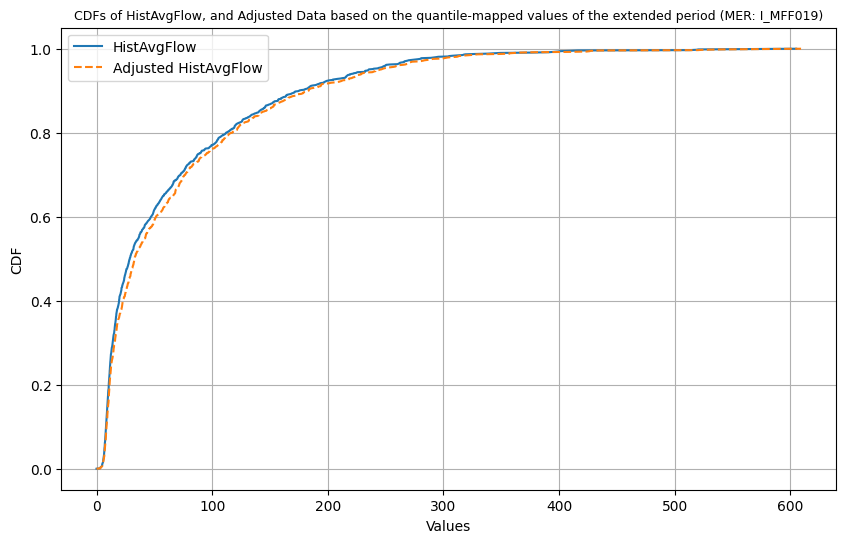

In [71]:
#### This is working properly for plotting the differnt periods of quantile mapping (different quantile period)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('bias_corrected_historical_data_interpolated_MER_I_MFF019.csv')
#df = pd.read_csv('bias_corrected_historical_data_interpolated_WFR_I_WBF015_test2.csv')


# Columns
#scenario1_col = 'PostFire_realistic'
#scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'
adjusted_col = 'adjusted_historical'  # Assuming this is already calculated and added to the DataFrame


def calculate_cdf(data):
    data_sorted = np.sort(data)
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    return data_sorted, cdf

# Calculate CDFs for each dataset
#postfire_x, postfire_cdf = calculate_cdf(df[scenario1_col].dropna())
#prefire_x, prefire_cdf = calculate_cdf(df[scenario2_col].dropna())
historical_x, historical_cdf = calculate_cdf(df[historical_col].dropna())
adjusted_x, adjusted_cdf = calculate_cdf(df[adjusted_col].dropna())

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(postfire_x, postfire_cdf, label='PostFire')
#plt.plot(prefire_x, prefire_cdf, label='PreFire')
plt.plot(historical_x, historical_cdf, label='HistAvgFlow')
plt.plot(adjusted_x, adjusted_cdf, label='Adjusted HistAvgFlow', linestyle='--')



plt.title('CDFs of HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the extended period (MER: I_MFF019)', fontsize=9)
#plt.title('CDFs of HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the extended period (WFR: I_WBF015)', fontsize=9)
plt.xlabel('Values')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

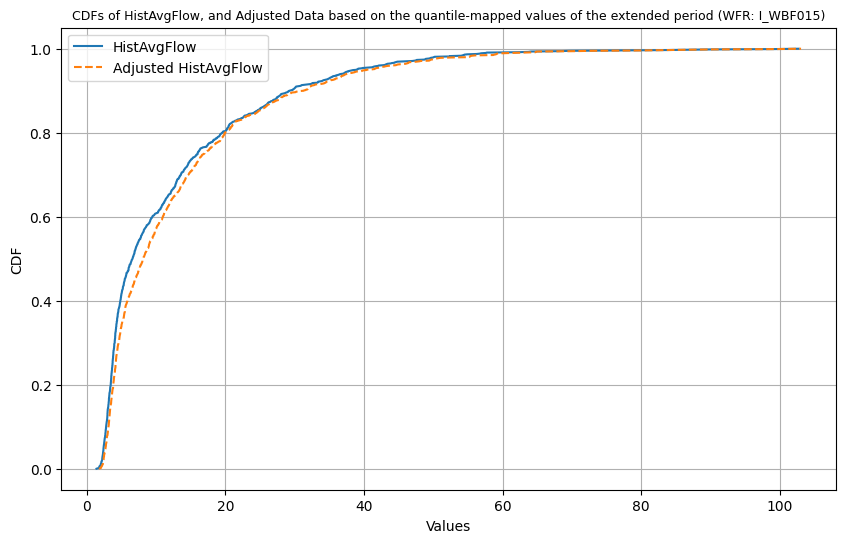

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
#df = pd.read_csv('bias_corrected_historical_data_interpolated_MER_I_MFF019.csv')
df = pd.read_csv('bias_corrected_historical_data_interpolated_WFR_I_WBF015.csv')

# Columns
#scenario1_col = 'PostFire_realistic'
#scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'
adjusted_col = 'adjusted_historical'  # Assuming this is already calculated and added to the DataFrame

# Function to calculate CDF
def calculate_cdf(data):
    # Sort data
    data_sorted = np.sort(data)
    # Calculate CDF values
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    return data_sorted, cdf

# Calculate CDFs for each dataset
#postfire_x, postfire_cdf = calculate_cdf(df[scenario1_col].dropna())
#prefire_x, prefire_cdf = calculate_cdf(df[scenario2_col].dropna())
historical_x, historical_cdf = calculate_cdf(df[historical_col].dropna())
adjusted_x, adjusted_cdf = calculate_cdf(df[adjusted_col].dropna())

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(postfire_x, postfire_cdf, label='PostFire')
#plt.plot(prefire_x, prefire_cdf, label='PreFire')
plt.plot(historical_x, historical_cdf, label='HistAvgFlow')
plt.plot(adjusted_x, adjusted_cdf, label='Adjusted HistAvgFlow', linestyle='--')

#plt.title('CDFs of PostFire, PreFire, HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the extended period (MER: I_MFF019)', fontsize=9)
plt.title('CDFs of HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the extended period (WFR: I_WBF015)', fontsize=9)
plt.xlabel('Values')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

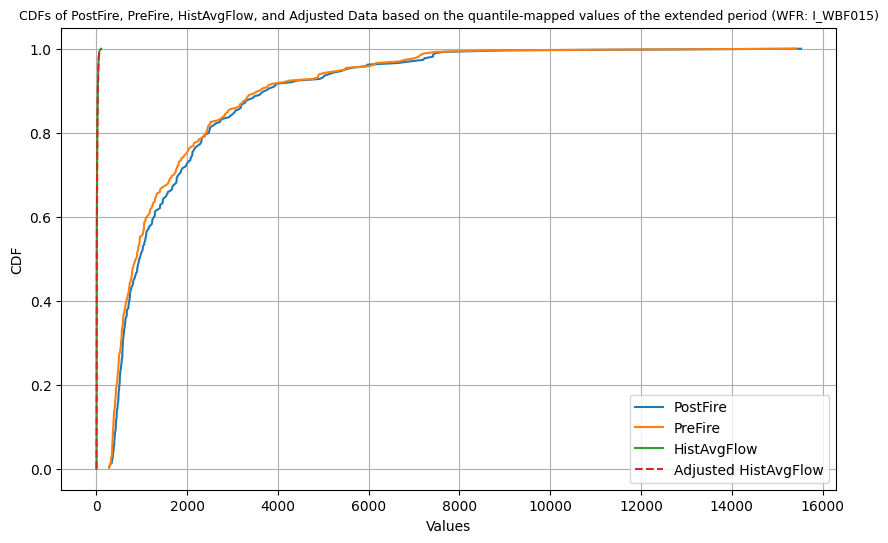

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
#df = pd.read_csv('bias_corrected_historical_data_interpolated_MER_I_MFF019.csv')
df = pd.read_csv('bias_corrected_historical_data_interpolated_WFR_I_WBF015.csv')

# Columns
#scenario1_col = 'PostFire_realistic'
#scenario2_col = 'PreFire_base'
historical_col = 'HistAvgFlow'
adjusted_col = 'adjusted_historical'  # Assuming this is already calculated and added to the DataFrame

# Function to calculate CDF
def calculate_cdf(data):
    # Sort data
    data_sorted = np.sort(data)
    # Calculate CDF values
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    return data_sorted, cdf

# Calculate CDFs for each dataset
#postfire_x, postfire_cdf = calculate_cdf(df[scenario1_col].dropna())
#prefire_x, prefire_cdf = calculate_cdf(df[scenario2_col].dropna())
historical_x, historical_cdf = calculate_cdf(df[historical_col].dropna())
adjusted_x, adjusted_cdf = calculate_cdf(df[adjusted_col].dropna())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(postfire_x, postfire_cdf, label='PostFire')
plt.plot(prefire_x, prefire_cdf, label='PreFire')
plt.plot(historical_x, historical_cdf, label='HistAvgFlow')
plt.plot(adjusted_x, adjusted_cdf, label='Adjusted HistAvgFlow', linestyle='--')

#plt.title('CDFs of PostFire, PreFire, HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the extended period (MER: I_MFF019)', fontsize=9)
plt.title('CDFs of PostFire, PreFire, HistAvgFlow, and Adjusted Data based on the quantile-mapped values of the extended period (WFR: I_WBF015)', fontsize=9)
plt.xlabel('Values')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()